# Tarea 1: Eugenio Paz Rodríguez
# Sebastián Neely

El efecto de la cuarentena ha sido debatido en el mundo entero: no por su contribución a la baja de casos (obviamente funciona) sino por su impacto en las redes socio-económica de los países. En Chile, el efecto regional es poco conocido.

Su tarea es mostrar y explicar, en 16 gráficos (uno por región), como fue la evolución de la cuarentena (por día) y contestar las siguientes 2 preguntas: 
1) ¿Qué dia hubo la mayor cantidad de personas en cuarentena en cada región?

2) ¿Qué día hubo la mayor cantidad de personas en cuarentena en el país?

## 1. Importamos Librerias:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
from scipy import stats
from statsmodels import robust
%matplotlib inline

## 2. Cargamos DataFrames:

#### DP1 - Casos totales por comuna incremental:
##### Columnas y valores:  

**Región.**  
**Código Región.**  
**Comuna.**  
**Código comuna.**  
**Población.**  
**Múltiples columnas correspondientes a '[fecha]'.**: contienen los 'Casos Confirmados' reportados por el Ministerio de Salud de Chile en cada una de las fechas que se indican en las respectivas columnas.  
**Tasa**: La columna 'Tasa' contiene el número de casos confirmados por cada 100 mil habitantes de una población. 

#### PASO A PASO:
##### Columnas y valores:  

**codigo_region.**  
**region_residencia.**  
**codigo_comuna.**  
**comuna_residencia.**  
**zona**  
**fechas**  

### DataFrame (DP1):

In [3]:
DP1 = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master'
                     '/output/producto1/Covid-19.csv?raw=true', 
                   encoding='utf-8',
                   sep=',')
DP1

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-10-25,2021-10-29,2021-11-01,2021-11-05,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,Tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,30890.0,30983.0,31053.0,31125.0,31208.0,31361.0,31438.0,31519.0,31566.0,12751.3
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,72.0,72.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,5920.5
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,10864.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,216.0,216.0,217.0,216.0,216.0,216.0,217.0,216.0,217.0,8628.2
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,206.0,206.0,209.0,211.0,211.0,212.0,213.0,214.0,215.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Magallanes,12,Rio Verde,12103.0,211.0,0.0,0.0,0.0,0.0,0.0,...,17.0,17.0,17.0,18.0,18.0,18.0,18.0,18.0,18.0,8530.8
358,Magallanes,12,San Gregorio,12104.0,681.0,0.0,0.0,0.0,0.0,0.0,...,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,10866.4
359,Magallanes,12,Timaukel,12303.0,282.0,0.0,0.0,0.0,0.0,0.0,...,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,14893.6
360,Magallanes,12,Torres del Paine,12402.0,1021.0,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,2154.8


## 3. Entendimiento del DataSet (DP1):

In [4]:
#Saber la cantidad de filas y columnas
print('El número de filas es: ',DP1.shape[0],'\nEl numero de columans es: ',DP1.shape[1])

El número de filas es:  362 
El numero de columans es:  181


In [5]:
#Saber los encabezados
print(DP1.columns.values)

['Region' 'Codigo region' 'Comuna' 'Codigo comuna' 'Poblacion'
 '2020-03-30' '2020-04-01' '2020-04-03' '2020-04-06' '2020-04-08'
 '2020-04-10' '2020-04-13' '2020-04-15' '2020-04-17' '2020-04-20'
 '2020-04-24' '2020-04-27' '2020-05-01' '2020-05-04' '2020-05-08'
 '2020-05-11' '2020-05-15' '2020-05-18' '2020-05-22' '2020-05-25'
 '2020-05-29' '2020-06-01' '2020-06-05' '2020-06-08' '2020-06-12'
 '2020-06-15' '2020-06-19' '2020-06-23' '2020-06-28' '2020-07-01'
 '2020-07-05' '2020-07-10' '2020-07-13' '2020-07-17' '2020-07-20'
 '2020-07-24' '2020-07-27' '2020-07-31' '2020-08-03' '2020-08-07'
 '2020-08-10' '2020-08-14' '2020-08-17' '2020-08-21' '2020-08-24'
 '2020-08-28' '2020-08-31' '2020-09-04' '2020-09-07' '2020-09-11'
 '2020-09-14' '2020-09-18' '2020-09-21' '2020-09-25' '2020-09-28'
 '2020-10-02' '2020-10-05' '2020-10-09' '2020-10-12' '2020-10-16'
 '2020-10-19' '2020-10-24' '2020-10-26' '2020-10-30' '2020-11-02'
 '2020-11-06' '2020-11-09' '2020-11-13' '2020-11-16' '2020-11-20'
 '2020-11-23'

In [6]:
#Saber toda la info básica del dataset
DP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Columns: 181 entries, Region to Tasa
dtypes: float64(178), int64(1), object(2)
memory usage: 512.0+ KB


## 4. Limpieza y Preparación de datos (DP1):

A continuación, extraeremos solo las columnas que nos servirán para responder el enunciado.  
Eliminaremos las columnas de fechas.  
Ordenaremos las columnas para ubicar la región al comienzo.  
Ordenaremos en orden descendente según región.

In [7]:
#Duplicando el DS para dejar solo las columnas que no servirán
df2 = pd.DataFrame(DP1)[['Region','Codigo region','Comuna','Codigo comuna','Poblacion']]
#eliminamos datos nulos
df2 = df2.dropna()
df2

,Region,Codigo region,Comuna,Codigo comuna,Poblacion
0,Arica y Parinacota,15,Arica,15101.0,247552.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0
5,Tarapacá,1,Alto Hospicio,1107.0,129999.0
...,...,...,...,...,...
356,Magallanes,12,Punta Arenas,12101.0,141984.0
357,Magallanes,12,Rio Verde,12103.0,211.0
358,Magallanes,12,San Gregorio,12104.0,681.0
359,Magallanes,12,Timaukel,12303.0,282.0


In [8]:
#Renombramos columnas
df2 = df2.rename(columns={'Region':'Nombre_Region','Comuna':'Nombre_Comuna','Codigo comuna':'Codigo_Comuna'})
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 0 to 360
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nombre_Region  346 non-null    object 
 1   Codigo region  346 non-null    int64  
 2   Nombre_Comuna  346 non-null    object 
 3   Codigo_Comuna  346 non-null    float64
 4   Poblacion      346 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 16.2+ KB


In [9]:
#Transformamos el tipo de dato de las columnas "Codigo_Comuna" y "Poblacion"para poder juntarlos con la otra tabla. (deben estar en int)
df2['Poblacion']=df2['Poblacion'].astype(int)
df2['Codigo_Comuna']=df2['Codigo_Comuna'].astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 0 to 360
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nombre_Region  346 non-null    object
 1   Codigo region  346 non-null    int64 
 2   Nombre_Comuna  346 non-null    object
 3   Codigo_Comuna  346 non-null    int32 
 4   Poblacion      346 non-null    int32 
dtypes: int32(2), int64(1), object(2)
memory usage: 13.5+ KB


### DataFrame (PASO A PASO):

In [12]:
PlanPasoP=pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/input/Paso_a_paso/paso_a_paso.csv?raw=true', sep=',')

In [13]:
#Vemos data frame
PlanPasoP.head()

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19,2021-11-20,2021-11-21,2021-11-22,2021-11-23,2021-11-24
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,15,Arica y Parinacota,15101,Arica,Urbana,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
2,15,Arica y Parinacota,15102,Camarones,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
3,15,Arica y Parinacota,15202,General Lagos,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
4,15,Arica y Parinacota,15201,Putre,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4


In [16]:
#Pasamos las fechas desde columnas a filas
PlanPasoP2=PlanPasoP.melt(id_vars=["codigo_region","region_residencia","codigo_comuna","comuna_residencia","zona"], var_name="fecha", value_name="paso")
PlanPasoP2

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,fecha,paso
0,15,Arica y Parinacota,15101,Arica,Rural,2020-07-28,3
1,15,Arica y Parinacota,15101,Arica,Urbana,2020-07-28,1
2,15,Arica y Parinacota,15102,Camarones,Total,2020-07-28,3
3,15,Arica y Parinacota,15202,General Lagos,Total,2020-07-28,3
4,15,Arica y Parinacota,15201,Putre,Total,2020-07-28,3
...,...,...,...,...,...,...,...
188175,12,Magallanes,12101,Punta Arenas,Total,2021-11-24,4
188176,12,Magallanes,12103,Río Verde,Total,2021-11-24,4
188177,12,Magallanes,12104,San Gregorio,Total,2021-11-24,4
188178,12,Magallanes,12303,Timaukel,Total,2021-11-24,4


In [17]:
#Renombramos columnas para unir tablas:
PlanPasoP2 = PlanPasoP2.rename(columns={'region_residencia':'Nombre_Region','comuna_residencia':'Nombre_Comuna','codigo_comuna':'Codigo_Comuna'})

## 5. Unión de tablas (DP29 y DP1):

A continuación uniremos las dos tablas

In [29]:
#Unimos tablas
Union=df2.merge(PlanPasoP2, on='Codigo_Comuna')
Union

,Nombre_Region_x,Codigo region,Nombre_Comuna_x,Codigo_Comuna,Poblacion,codigo_region,Nombre_Region_y,Nombre_Comuna_y,zona,fecha,paso
0,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Rural,2020-07-28,3
1,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Urbana,2020-07-28,1
2,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Rural,2020-07-29,3
3,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Urbana,2020-07-29,1
4,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Rural,2020-07-30,3
...,...,...,...,...,...,...,...,...,...,...,...
188175,Magallanes,12,Torres del Paine,12402,1021,12,Magallanes,Torres del Paine,Total,2021-11-20,4
188176,Magallanes,12,Torres del Paine,12402,1021,12,Magallanes,Torres del Paine,Total,2021-11-21,4
188177,Magallanes,12,Torres del Paine,12402,1021,12,Magallanes,Torres del Paine,Total,2021-11-22,4
188178,Magallanes,12,Torres del Paine,12402,1021,12,Magallanes,Torres del Paine,Total,2021-11-23,4


In [32]:
#con esto, contabilizo los dias que existen entre fechas de pandemia

Union['Poblacion'][Union['paso'] == 2] = 0
Union['Poblacion'][Union['paso'] == 3] = 0
Union['Poblacion'][Union['paso'] == 4] = 0
Union['Poblacion'][Union['paso'] == 5] = 0
Union

<ipython-input-32-2b1f793beb72>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Union['Poblacion'][Union['paso'] == 2] = 0
<ipython-input-32-2b1f793beb72>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Union['Poblacion'][Union['paso'] == 3] = 0
<ipython-input-32-2b1f793beb72>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Union['Poblacion'][Union['paso'] == 4] = 0
<ipython-input-32-2b1f793beb72>:15: SettingWithCopyWarning: 
A v

,Nombre_Region_x,Codigo region,Nombre_Comuna_x,Codigo_Comuna,Poblacion,codigo_region,Nombre_Region_y,Nombre_Comuna_y,zona,fecha,paso
0,Arica y Parinacota,15,Arica,15101,0,15,Arica y Parinacota,Arica,Rural,2020-07-28,3
1,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Urbana,2020-07-28,1
2,Arica y Parinacota,15,Arica,15101,0,15,Arica y Parinacota,Arica,Rural,2020-07-29,3
3,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Urbana,2020-07-29,1
4,Arica y Parinacota,15,Arica,15101,0,15,Arica y Parinacota,Arica,Rural,2020-07-30,3
...,...,...,...,...,...,...,...,...,...,...,...
188175,Magallanes,12,Torres del Paine,12402,0,12,Magallanes,Torres del Paine,Total,2021-11-20,4
188176,Magallanes,12,Torres del Paine,12402,0,12,Magallanes,Torres del Paine,Total,2021-11-21,4
188177,Magallanes,12,Torres del Paine,12402,0,12,Magallanes,Torres del Paine,Total,2021-11-22,4
188178,Magallanes,12,Torres del Paine,12402,0,12,Magallanes,Torres del Paine,Total,2021-11-23,4


In [49]:
#Ordeno por fechas
Union=Union.sort_values(by='fecha', ascending=True)  
Union

,Nombre_Region_x,Codigo region,Nombre_Comuna_x,Codigo_Comuna,Poblacion,codigo_region,Nombre_Region_y,Nombre_Comuna_y,zona,fecha,paso
0,Arica y Parinacota,15,Arica,15101,0,15,Arica y Parinacota,Arica,Rural,2020-07-28,3
47045,Metropolitana,13,El Monte,13602,40014,13,Metropolitana,El Monte,Total,2020-07-28,1
35405,Valparaíso,5,Putaendo,5705,0,5,Valparaíso,Putaendo,Total,2020-07-28,3
55775,Metropolitana,13,Melipilla,13501,0,13,Metropolitana,Melipilla,Rural,2020-07-28,3
41710,Valparaíso,5,Zapallar,5405,0,5,Valparaíso,Zapallar,Total,2020-07-28,3
...,...,...,...,...,...,...,...,...,...,...,...
968,Arica y Parinacota,15,Arica,15101,0,15,Arica y Parinacota,Arica,Rural,2021-11-24,3
10184,Antofagasta,2,San Pedro de Atacama,2203,0,2,Antofagasta,San Pedro de Atacama,Total,2021-11-24,4
11154,Antofagasta,2,Taltal,2104,0,2,Antofagasta,Taltal,Total,2021-11-24,3
5334,Tarapacá,1,Pica,1405,0,1,Tarapacá,Pica,Total,2021-11-24,3


In [48]:
#Total de gente en cuarentena en el pais
TotalCuarentena=Union.groupby(['fecha']).sum() 
TotalCuarentena

,Codigo region,Codigo_Comuna,Poblacion,codigo_region,paso
fecha,,,,,
2020-07-28,3455,3547051,9833441,3455,1106
2020-07-29,3455,3547051,10609230,3455,1100
2020-07-30,3455,3547051,10609230,3455,1100
2020-07-31,3455,3547051,10609230,3455,1100
2020-08-01,3455,3547051,10609230,3455,1099
...,...,...,...,...,...
2021-11-20,3455,3547051,0,3455,1350
2021-11-21,3455,3547051,0,3455,1350
2021-11-22,3455,3547051,0,3455,1350


## 6. Graficos (DP1 y Plan paso a paso):

Se ordenará y generarán gráficos correspondientes.

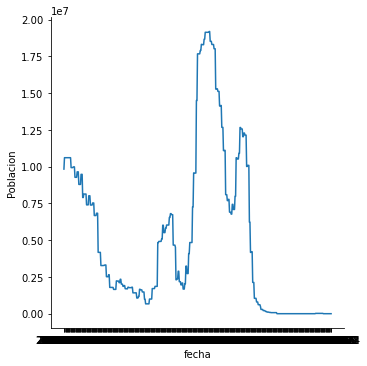

In [44]:
#grafico de cantidad de gente total en el pais en cuarentena.
sns.relplot(x='fecha', y='Poblacion', data=TotalCuarentena, kind="line")

In [51]:
#Generamos data set para cada region 

#TARAPACA
Union1=Union[(Union['codigo_region']==1)] 
#ANTOFAGASTA
Union2=Union[(Union['codigo_region']==2)] 
#ATACAMA
Union3=Union[(Union['codigo_region']==3)] 
#COQUIMBO
Union4=Union[(Union['codigo_region']==4)] 
#VALPARAISO
Union5=Union[(Union['codigo_region']==5)] 
#O'HIGGINS
Union6=Union[(Union['codigo_region']==6)] 
#EL MAULE
Union7=Union[(Union['codigo_region']==7)] 
#EL BIOBIO
Union8=Union[(Union['codigo_region']==8)]
#LA ARAUCANIA
Union9=Union[(Union['codigo_region']==9)] 
#LOS LAGOS
Union10=Union[(Union['codigo_region']==10)] 
#AYSEN
Union11=Union[(Union['codigo_region']==11)] 
#MAGALLANES Y LA ANTARTICA CHILENA
Union12=Union[(Union['codigo_region']==12)] 
#METROPOLITANA DE SANTIAGO
Union13=Union[(Union['codigo_region']==13)] 
#LOS RIOS
Union14=Union[(Union['codigo_region']==14)] 
#ARICA Y PARINACOTA
Union15=Union[(Union['codigo_region']==15)] 
#ÑUBLE
Union16=Union[(Union['codigo_region']==16)] 



<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

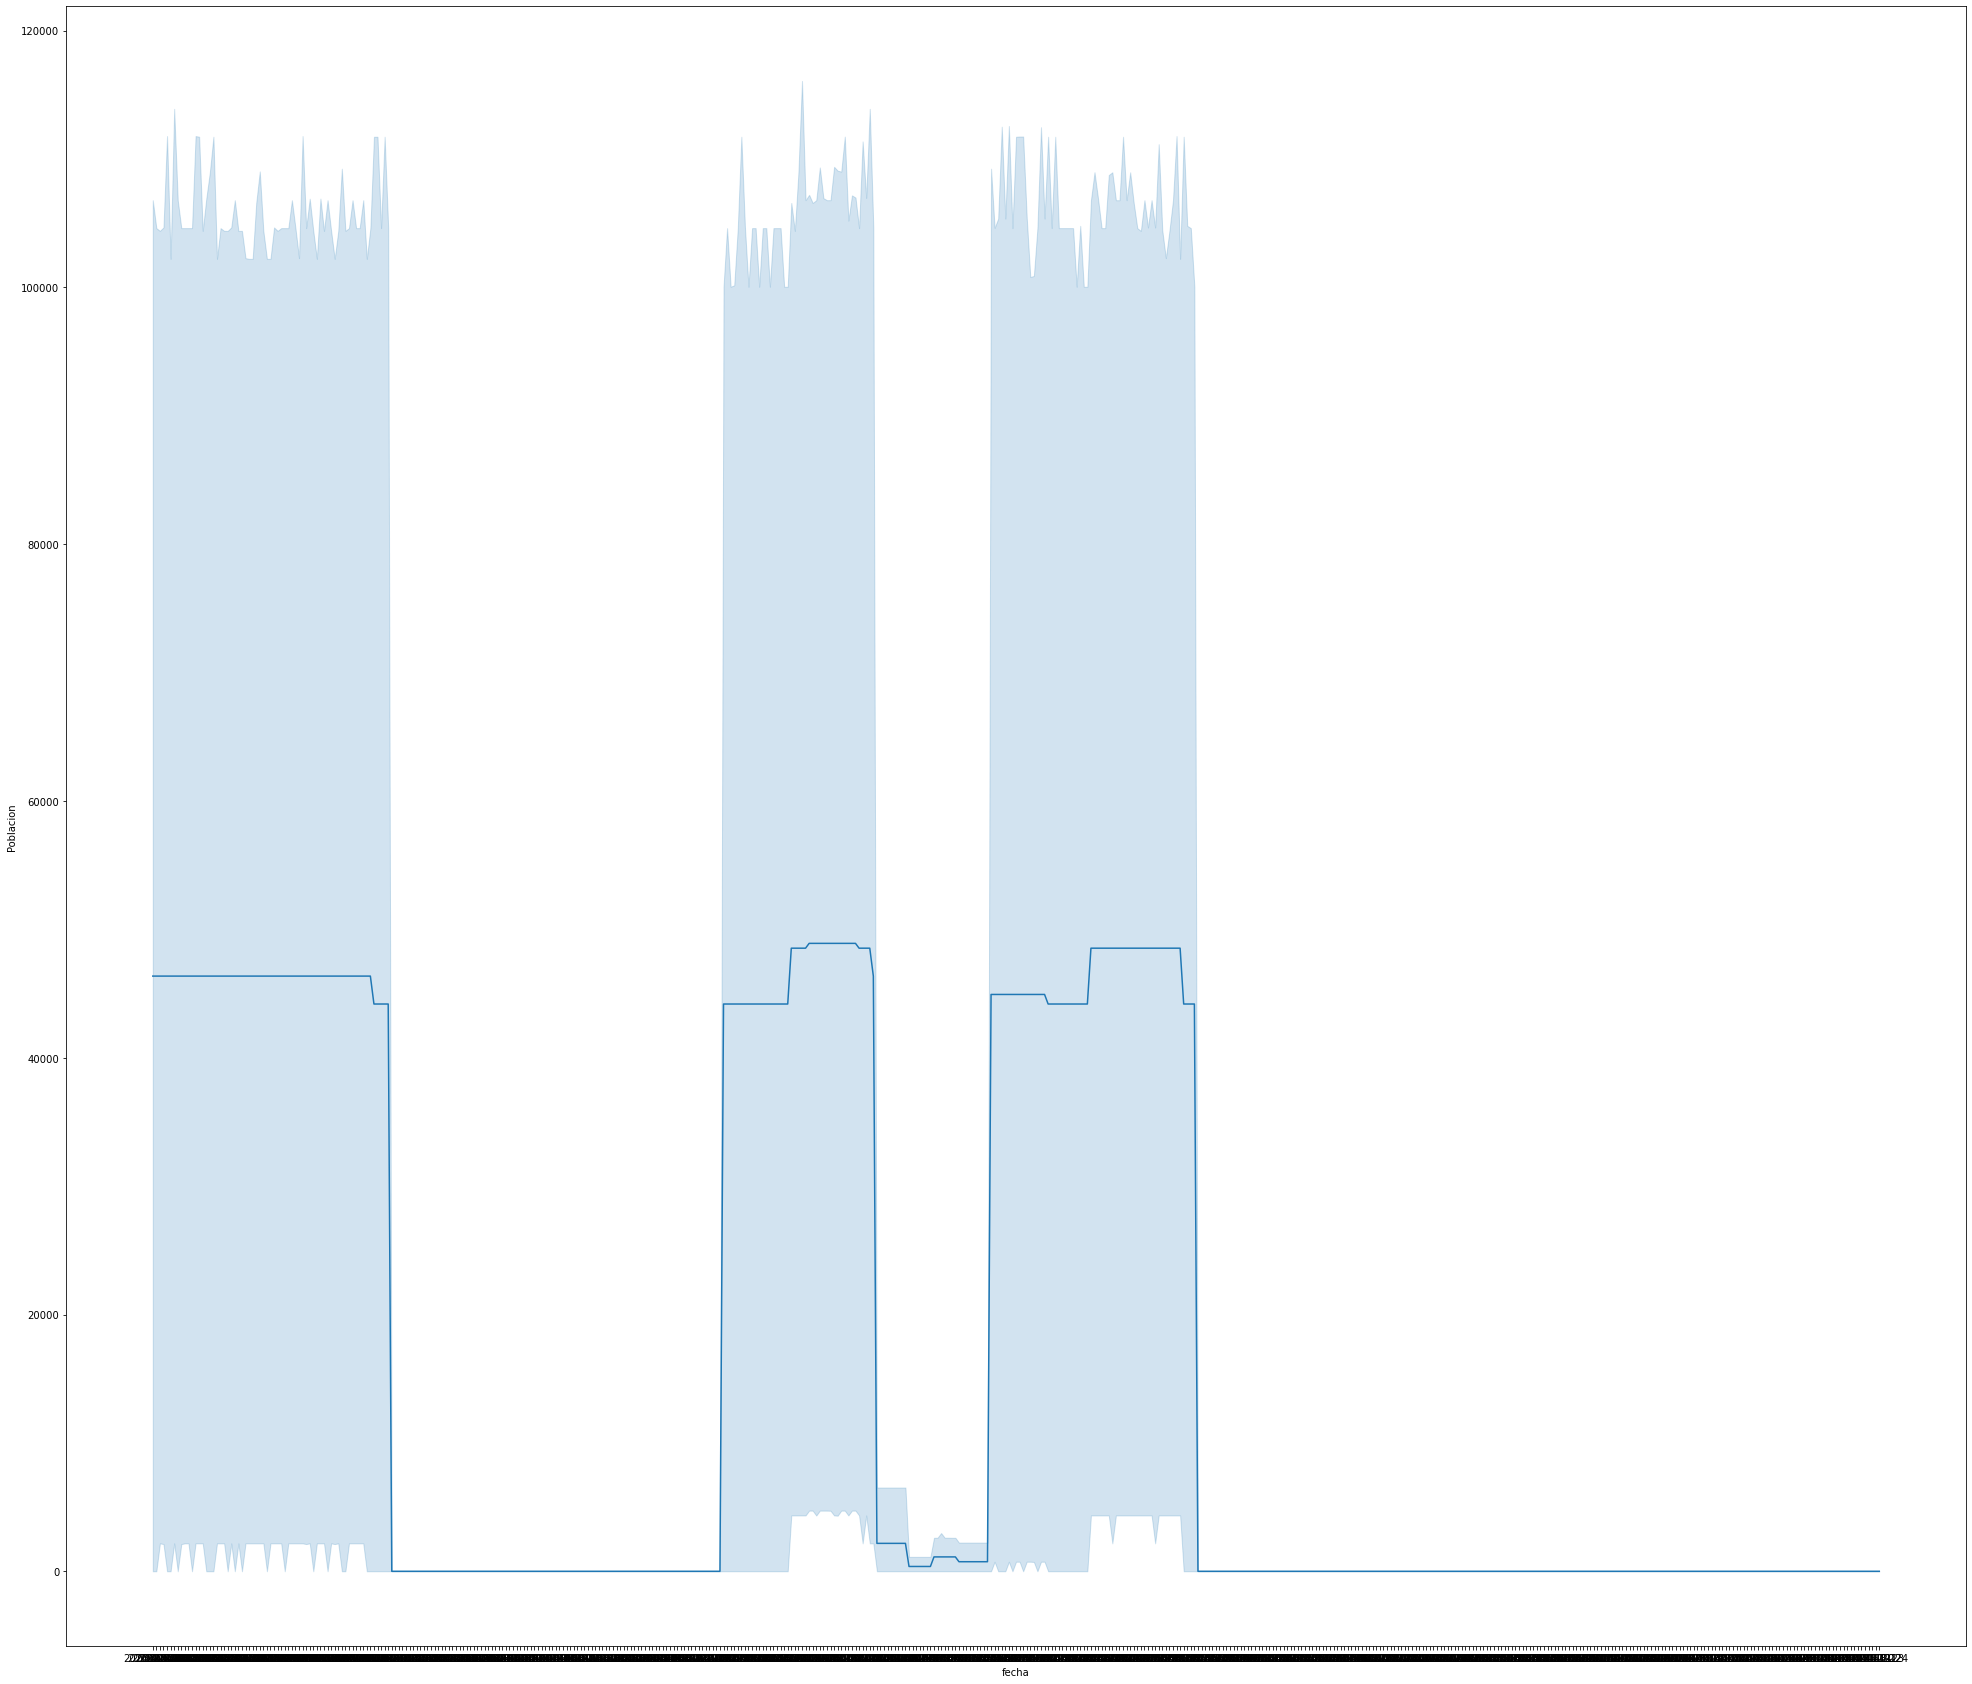

In [58]:
#Graficamos por region, se mostrará solo 1 gráfico, ya que el resto de las imágenes demora mucho.

sns.lineplot(x='fecha', y='Poblacion', data=Union1)
#sns.lineplot(x='fecha', y='Poblacion', data=Union2)
#sns.lineplot(x='fecha', y='Poblacion', data=Union3)
#sns.lineplot(x='fecha', y='Poblacion', data=Union4)
#sns.lineplot(x='fecha', y='Poblacion', data=Union5)
#sns.lineplot(x='fecha', y='Poblacion', data=Union6)
#sns.lineplot(x='fecha', y='Poblacion', data=Union7)
#sns.lineplot(x='fecha', y='Poblacion', data=Union8)
#sns.lineplot(x='fecha', y='Poblacion', data=Union9)
#sns.lineplot(x='fecha', y='Poblacion', data=Union10)
#sns.lineplot(x='fecha', y='Poblacion', data=Union11)
#sns.lineplot(x='fecha', y='Poblacion', data=Union12)
#sns.lineplot(x='fecha', y='Poblacion', data=Union13)
#sns.lineplot(x='fecha', y='Poblacion', data=Union14)
#sns.lineplot(x='fecha', y='Poblacion', data=Union15)
#sns.lineplot(x='fecha', y='Poblacion', data=Union16)